## IMPORT LIBRARIES

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from pandas_profiling import ProfileReport
%matplotlib inline



## DATA PREPROCESSING 

In [2]:
df = pd.read_csv("Dataset/dataset.csv")

* Load dataset into notebook.

In [3]:
ProfileReport(df) # To generate report the cell must be executed

Summarize dataset:   0%|          | 0/34 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

* Exploratory data analysis using Pandas Profiling.

In [4]:
df = df.drop("customerID" , axis=1)

* Drop **customerID** column.

In [5]:
df.TotalCharges = pd.to_numeric(df.TotalCharges , errors="coerce")
df.SeniorCitizen = df.SeniorCitizen.astype(str)

* Convert features into true data types.

In [6]:
df = df.dropna()

* Drop **NULL** values , contains 11 in TotalCharges.

In [7]:
labels = ["{0} - {1}" .format(i,i+11) for i in range(1,72,12)]
df["tenure_group"] = pd.cut(df.tenure , range(1,74,12) , right=False , labels=labels)

* Distribute **tenure** into bins.

In [8]:
df = df.drop("tenure" , axis = 1)

* Drop tenure , because its already divided into bins.

In [9]:
df.describe()

MonthlyCharges  TotalCharges
count     7032.000000   7032.000000
mean        64.798208   2283.300441
std         30.085974   2266.771362
min         18.250000     18.800000
25%         35.587500    401.450000
50%         70.350000   1397.475000
75%         89.862500   3794.737500
max        118.750000   8684.800000

# UNIVARIATE ANALYSIS 

* Generate Bar graph for every feature with respect to Churn.

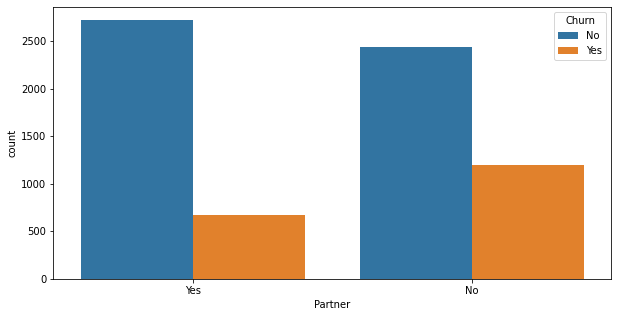

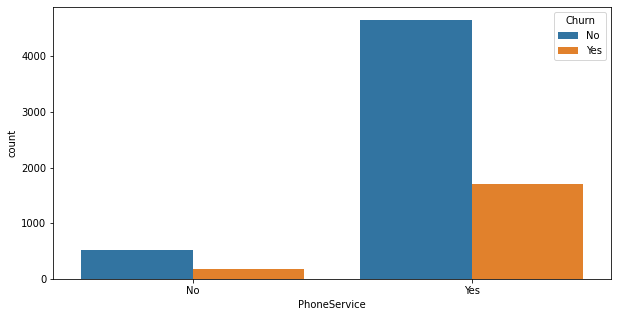

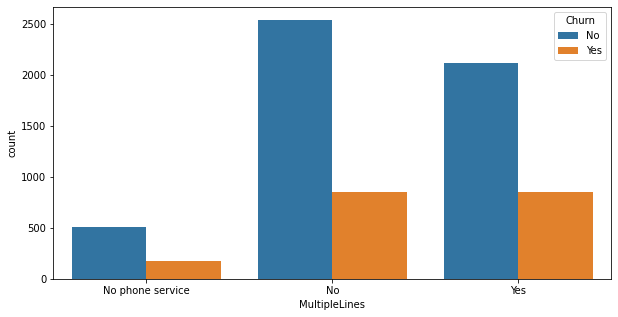

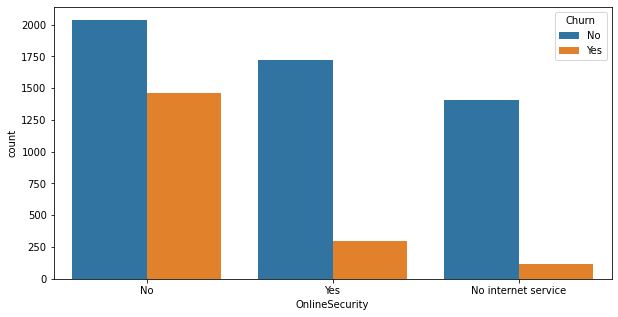

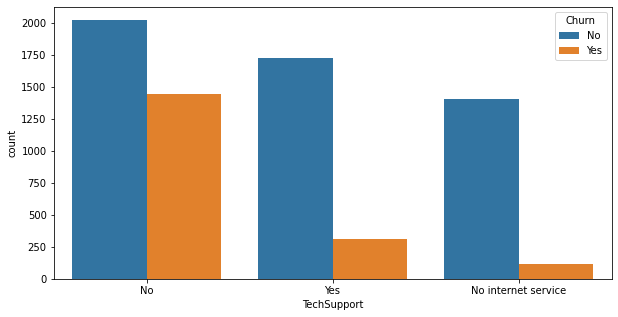

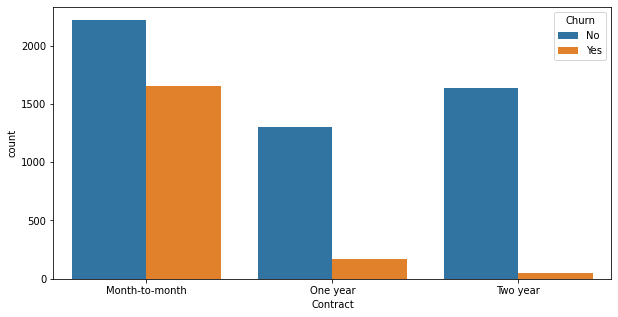

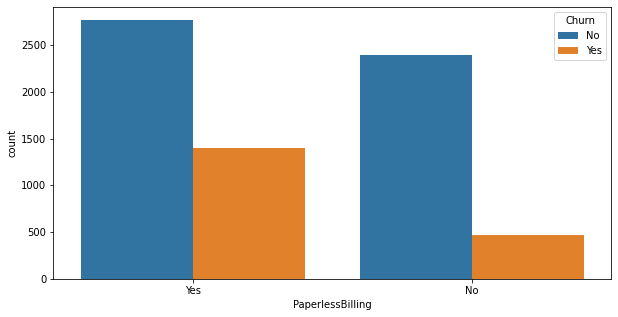

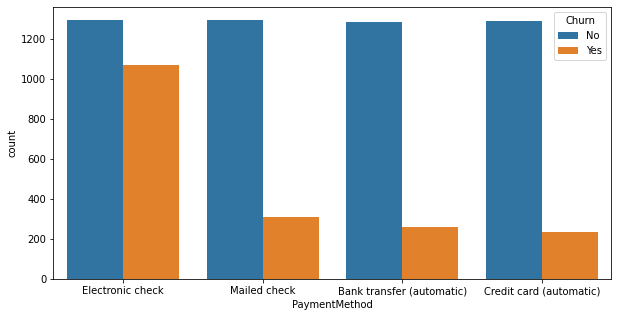

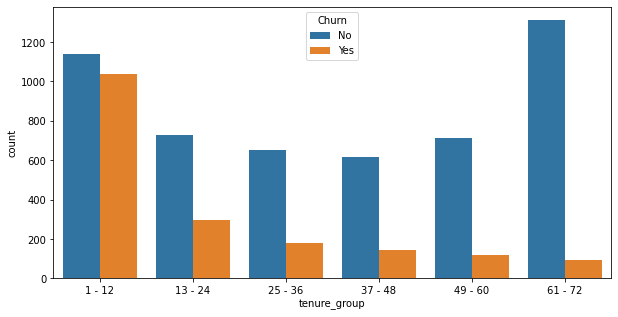

In [10]:
for feature_count , feature in enumerate(df.drop(columns=['Churn','TotalCharges','MonthlyCharges'])):
    plt.figure(feature_count,figsize=(10,5))
    sns.countplot(data=df,x=feature,hue='Churn')

* Features that impact customer's churn ratio: <br>
1 DeviceProtection                    
2 OnlineBackup                       
3 StreamingTV         
4 StreamingMovies    
5 TechSupport        
6 OnlineSecurity     
7 InternetService                     
8 tenure_group                  
9 PaymentMethod                           
10 Contract  

In [11]:
df.Churn = np.where(df.Churn == 'Yes' , 1 , 0)

* Convert churn mark from string to binary.

Text(0.5, 1.0, 'Monthly charges by churn')

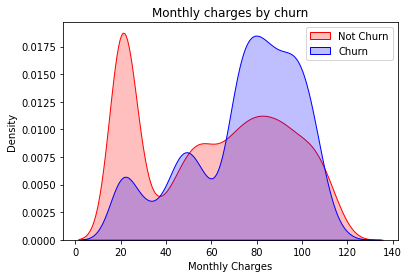

In [12]:
ang = sns.kdeplot(df.MonthlyCharges[(df["Churn"] == 0) ],
                color="Red", shade = True)
ang = sns.kdeplot(df.MonthlyCharges[(df["Churn"] == 1) ],
                ax =ang, color="Blue", shade= True)
ang.legend(["Not Churn","Churn"],loc='upper right')
ang.set_ylabel('Density')
ang.set_xlabel('Monthly Charges')
ang.set_title('Monthly charges by churn')

* We can say that churn ratio is directly proportional to monthly charges.

Text(0.5, 1.0, 'Total charges by churn')

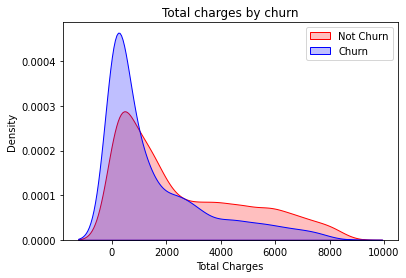

In [13]:
ang = sns.kdeplot(df.TotalCharges[(df["Churn"] == 0) ],
                color="Red", shade = True)
ang = sns.kdeplot(df.TotalCharges[(df["Churn"] == 1) ],
                ax =ang, color="Blue", shade= True)
ang.legend(["Not Churn","Churn"],loc='upper right')
ang.set_ylabel('Density')
ang.set_xlabel('Total Charges')
ang.set_title('Total charges by churn')

* We can say that churn ratio is inversely proportional to total charges.

In [14]:
df_with_dummies = pd.get_dummies(df)

* Perform one-hot-encoding on every feature without droping the last.

In [15]:
scalar = StandardScaler()
df_with_dummies[['MonthlyCharges','TotalCharges']] = scalar.fit_transform(df_with_dummies[['MonthlyCharges','TotalCharges']])

* Perform standard scaling on numerical features to shrink them into between numerical points, e.g: 0 - 1

In [16]:
df_with_dummies[['TotalCharges','MonthlyCharges']].describe()

TotalCharges  MonthlyCharges
count  7.032000e+03    7.032000e+03
mean  -1.119064e-16    6.062651e-17
std    1.000071e+00    1.000071e+00
min   -9.990692e-01   -1.547283e+00
25%   -8.302488e-01   -9.709769e-01
50%   -3.908151e-01    1.845440e-01
75%    6.668271e-01    8.331482e-01
max    2.824261e+00    1.793381e+00

# CONCLUSION

Electronic check medium are the highest churners
Contract Type - Monthly customers are more likely to churn because of no contract terms, as they are free to go customers.
No Online security, No Tech Support category are high churners
Non senior Citizens are high churners


# SAVE DATASET

In [17]:
# df_with_dummies.to_csv('Dataset/df_with_dummies.csv')

* Save dataset

# STD AND MEAN

In [18]:
scalar.scale_

array([  30.08383459, 2266.61018071])

In [19]:
scalar.mean_

array([  64.79820819, 2283.30044084])